# Applied Deep Learning: Assignment 2
## Angel Sarmiento
asarmiento6426@floridapoly.edu

# Introduction" Regression

---

For this project, we are going to work on evaluating price of houses given the following features:

1. Year of sale of the house
2. The age of the house at the time of sale
3. Distance from city center
4. Number of stores in the locality
5. The latitude
6. The longitude


Note: This notebook uses `python 3` and these packages: `tensorflow`, `pandas`, `matplotlib`, `scikit-learn`.
This exercise use pandas a power data manipulation tool built on top of the NumPy

## 1.1: Importing Libraries & Helper Functions

First of all, we will need to import some libraries and helper functions. This includes TensorFlow and some utility functions that I've written to save time.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline

import os

# Task 2: Importing the Data

## 2.1: Importing the Data

The dataset is saved in a `data.csv` file. We will use `pandas` to take a look at some of the rows.

In [26]:
print(os.getcwd())

/Users/angelsarmiento/Documents/Graduate/Second Year/Applied Deep Learning/Assignment_2/Houses-regression


In [27]:
#Reading the daeta in a dataframe, check the documentation on pandas

df = pd.read_csv('data.csv', names = column_names) 
df.head()


,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


## 2.2: Check Missing Data

It's a good practice to check if the data has any missing values. In real world data, this is quite common and must be taken care of before any data pre-processing or model training.

In [28]:
# .ssna() check for missing values per column #check documentation

df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

# Task 3: Data Normalization

## 3.1: Data Normalization

We can make it easier for optimization algorithms to find minimum by normalizing the data before training a model.

In [29]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## 3.2: Convert Label Value

Because we are using normalized values for the labels, we will get the predictions back from a trained model in the same distribution. So, we need to convert the predicted values back to the original distribution if we want predicted prices.

In [30]:
#Did you get the trick?

y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

print(convert_label_value(0.350088))

14263


# Task 4: Create Training and Test Sets

## 4.1: Select Features

Make sure to remove the column __price__ from the list of features as it is the label and should not be used as a feature.

In [31]:
#Normalize the first 6 columns

X = df_norm.iloc[:, :6]
X.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


## 4.2: Select Labels

In [32]:

Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## 4.3: Feature and the target variable (price)

We will need to extract just the numeric values for the features and labels as the TensorFlow model will expect just numeric values as input.

In [33]:
X_arr = X.values
Y_arr = Y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (5000, 6)
Y_arr shape:  (5000,)


## 4.4: Train and Test Split

We will keep some part of the data aside as a __test__ set. The model will not use this set during training and it will be used only for checking the performance of the model in trained and un-trained states. This way, we can make sure that we are going in the right direction with our model training.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.05, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4750, 6)
y_train shape:  (4750,)
X_test shape:  (250, 6)
y_test shape:  (250,)


# Task 5: Create the Model

## 5.1: Create the Model

Let's write a function that returns an untrained model of a certain architecture.

In [23]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


# Task 6: Model Training

## 6.1: Model Training

We can use an `EarlyStopping` callback from Keras to stop the model training if the validation loss stops decreasing for a few epochs.

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

model = get_model()

preds_on_untrained = model.predict(X_test)

history = model.fit( X_train, y_train, validation_data = (X_test, y_test), epochs = 1000)

Epoch 1/1000
149/149 [==============================] - 1s 4ms/step - loss: 2.3168 - val_loss: 2.0092
Epoch 2/1000
149/149 [==============================] - 0s 1ms/step - loss: 2.2400 - val_loss: 1.9951
Epoch 3/1000
149/149 [==============================] - 0s 1ms/step - loss: 2.2534 - val_loss: 1.9807
Epoch 4/1000
149/149 [==============================] - 0s 949us/step - loss: 2.1819 - val_loss: 1.9660
Epoch 5/1000
149/149 [==============================] - 0s 863us/step - loss: 2.2395 - val_loss: 1.9514
Epoch 6/1000
149/149 [==============================] - 0s 824us/step - loss: 2.2052 - val_loss: 1.9366
Epoch 7/1000
149/149 [==============================] - 0s 813us/step - loss: 2.2003 - val_loss: 1.9217
Epoch 8/1000
149/149 [==============================] - 0s 858us/step - loss: 2.1597 - val_loss: 1.9067
Epoch 9/1000
149/149 [==============================] - 0s 945us/step - loss: 2.1968 - val_loss: 1.8918
Epoch 10/1000
149/149 [==============================] - 0s 816us/step

KeyboardInterrupt: 

## 6.2: Plot Training and Validation Loss

Let's use the `plot_loss` helper function to take a look training and validation loss.

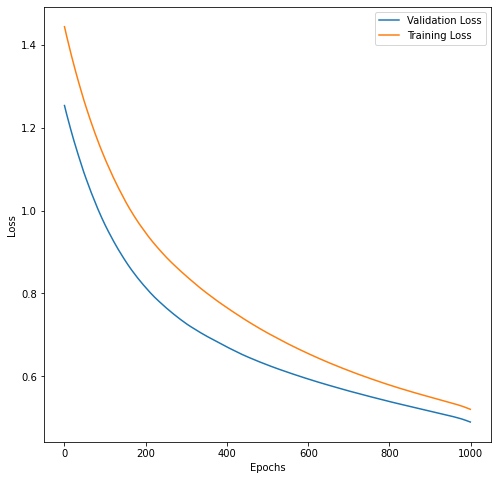

In [13]:
plot_loss(history)

# Task 7: Now try to measure how good in your model on the test set.


## Here, we are deviating a little bit from the Kaggle project

Let's make predictions using the test set (features), namel X_test

In [14]:
#Here, we are doing prediction using the test set 

preds_on_trained = model.predict(X_test)


## Iteratively testing the optimizers

Here, I am going to use 4 new optimizers to compare with the original optimizer used (AdaDelta) to compare their convergence performance. The five optimizers are listed in order as below: 
- SGD
- ADAM
- AdaDelta
- RMSProp 
- Nadam

In [15]:

# function to go through multiple optimizers at 50 epochs to see which one peforms the best 

# starting with a list of optimizers
opt_list = ['sgd', 'adam', 'adadelta', 'RMSprop', 'Nadam']

def test_optimizers(opt):
    # Building the network the same as before
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    #compiling with a different optimizer in the input of the function
    model.compile(
        loss='mse',
        optimizer=opt
    )
    
    return model

In [16]:
# creating an empty list to store the models in
model_list = []
model_preds = []
model_history = []

for i in opt_list:
    
    # appending to the list
    model_list.append(test_optimizers(i))


In [17]:
# Training
# setting up early stopping to train on the validation set
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

# loop to get each of the untrained model's predictions like before. could use a lambda function with map(), however I think this is easier to read
for i in range(len(model_list)): 
    model_preds.append(model_list[i].predict(X_test))
    
    # testing for 100 epochs each so im not waiting forever on results  
    model_history.append(model_list[i].fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 10)) 

/step - loss: 0.1517 - val_loss: 0.1527
Epoch 9/100
475/475 [==============================] - 0s 521us/step - loss: 0.1574 - val_loss: 0.1560
Epoch 10/100
475/475 [==============================] - 0s 561us/step - loss: 0.1530 - val_loss: 0.1587
Epoch 11/100
475/475 [==============================] - 0s 498us/step - loss: 0.1508 - val_loss: 0.1533
Epoch 12/100
475/475 [==============================] - 0s 499us/step - loss: 0.1501 - val_loss: 0.1546
Epoch 13/100
475/475 [==============================] - 0s 493us/step - loss: 0.1534 - val_loss: 0.1497
Epoch 14/100
475/475 [==============================] - 0s 495us/step - loss: 0.1519 - val_loss: 0.1509
Epoch 15/100
475/475 [==============================] - 0s 500us/step - loss: 0.1522 - val_loss: 0.1554
Epoch 16/100
475/475 [==============================] - 0s 499us/step - loss: 0.1514 - val_loss: 0.1503
Epoch 17/100
475/475 [==============================] - 0s 494us/step - loss: 0.1528 - val_loss: 0.1502
Epoch 18/100
475/475 [===

## Plotting the Different Optimizers

The next plots will be displayed in the order of the optimizers. To me it seems like optimizer 2, the Adam optimizer works the best and the model performs really well with little to no overfitting in successive epochs. I am confident that a model with the adam optimizer would work the best for converging on a solution. 

NOTE: This would be much clearer if I were to change the plot titles but seeing as there is more to the assignment I decided not to do this. I could also demonstrate performance times but that is beyond the scope of this exercise. 

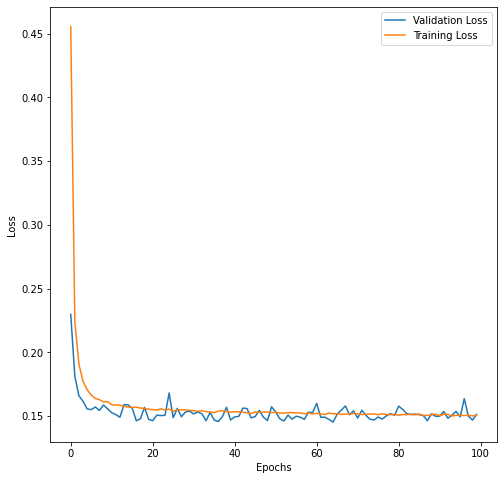

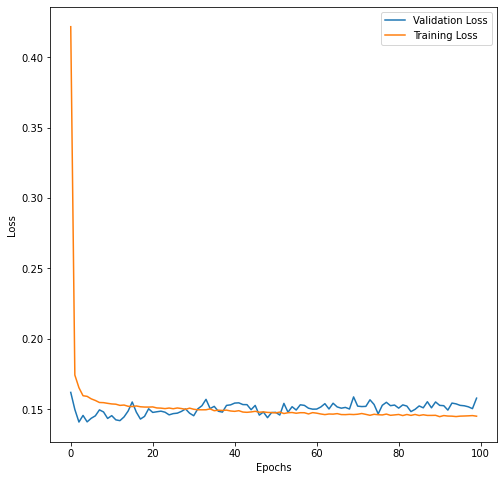

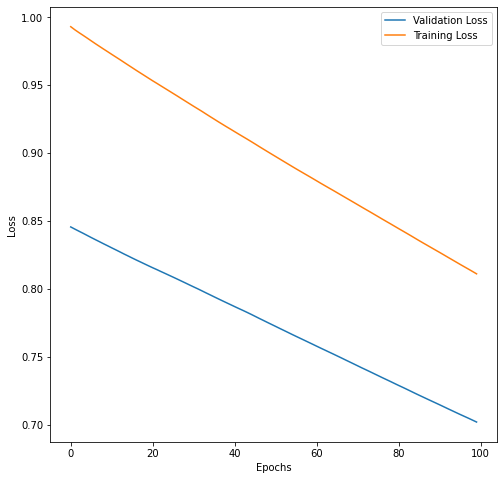

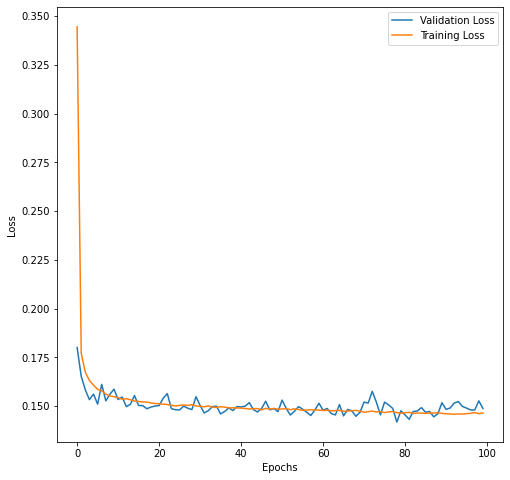

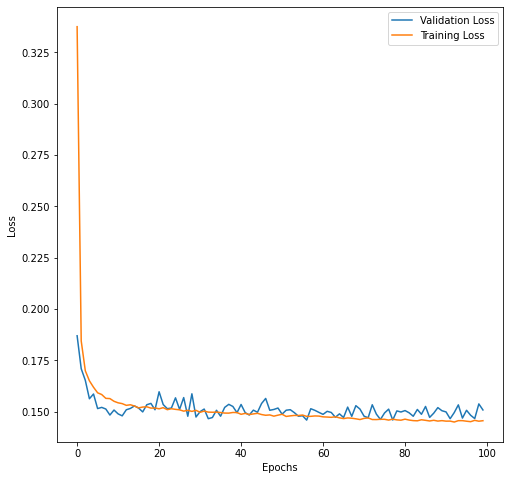

[None, None, None, None, None]

In [18]:
# plotting the lost of all of the models 
list(map(plot_loss, model_history))

## Trying different batch sizes
In this section I am going to try different batch sizes to see what works the best, and then test to see if we can sufficiently converge in under 20 epochs

In [19]:
# creating a list of different batch sizes, as well as an empty list for later appending
batches = [1, 3, 5, 15, 20, 40, 50, 75, 100]
adam_list = []

# same architecture as above
adam_model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    #compiling with the Adam optimizer
adam_model.compile(
      loss='mse',
      optimizer='adam'
    )

In [20]:
# keeping the early stopping settings from above, running models in a loop to test batch sizes 
for i in batches: 
    adam_list.append(adam_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = i))


Epoch 1/100
4750/4750 [==============================] - 2s 480us/step - loss: 0.5190 - val_loss: 0.1567
Epoch 2/100
4750/4750 [==============================] - 2s 478us/step - loss: 0.1672 - val_loss: 0.1558
Epoch 3/100
4750/4750 [==============================] - 2s 460us/step - loss: 0.1628 - val_loss: 0.1585
Epoch 4/100
4750/4750 [==============================] - 2s 465us/step - loss: 0.1590 - val_loss: 0.1451
Epoch 5/100
4750/4750 [==============================] - 2s 463us/step - loss: 0.1587 - val_loss: 0.1457
Epoch 6/100
4750/4750 [==============================] - 2s 458us/step - loss: 0.1594 - val_loss: 0.1552
Epoch 7/100
4750/4750 [==============================] - 2s 458us/step - loss: 0.1487 - val_loss: 0.1483
Epoch 8/100
4750/4750 [==============================] - 2s 456us/step - loss: 0.1570 - val_loss: 0.1521
Epoch 9/100
4750/4750 [==============================] - 2s 460us/step - loss: 0.1548 - val_loss: 0.1485
Epoch 10/100
4750/4750 [==============================]

KeyboardInterrupt: 

In [43]:
#beeps when the chunk is run (so I dont have to wait by my computer while the models train)
from beepy import beep
beep(sound = 'coin')

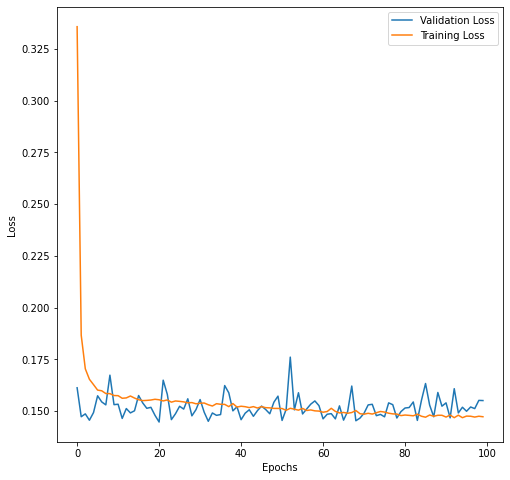

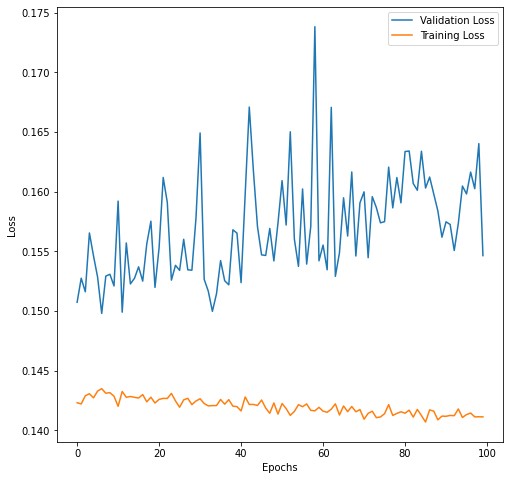

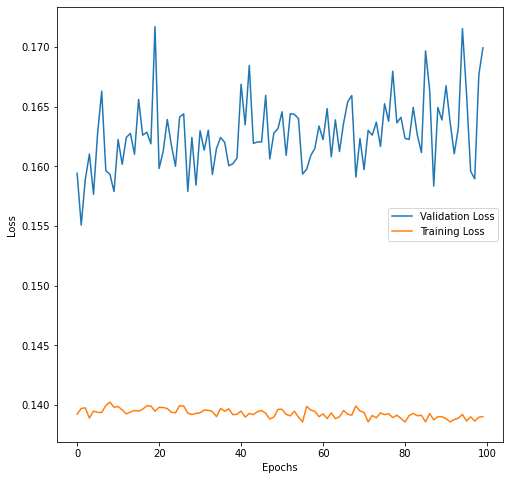

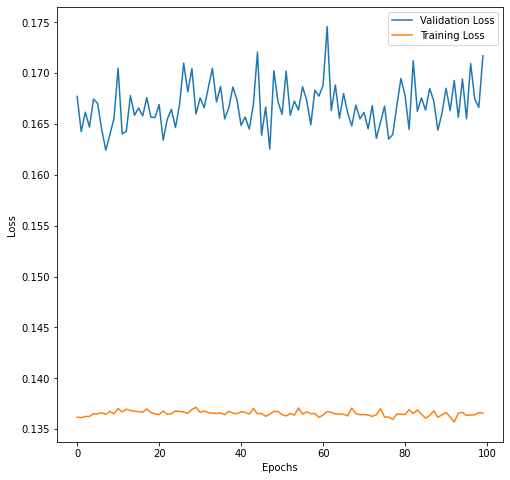

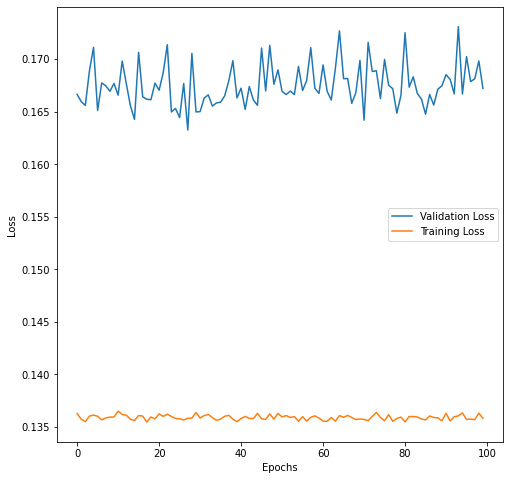

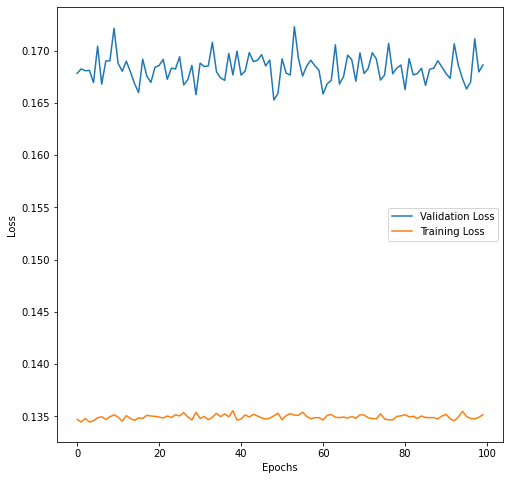

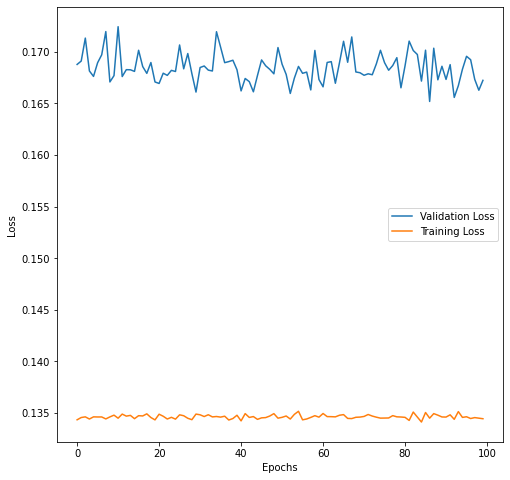

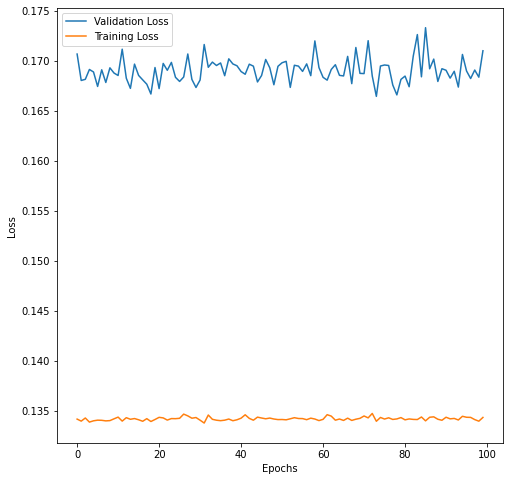

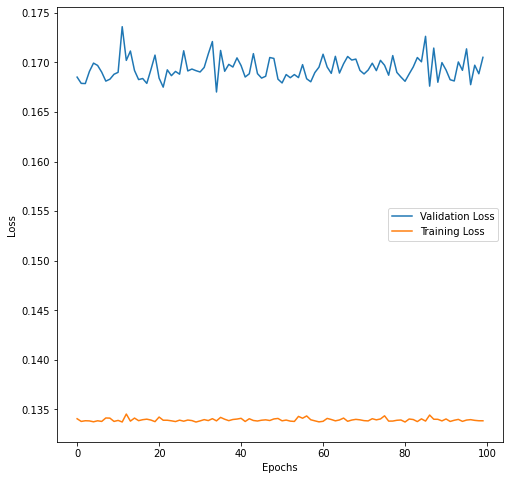

[None, None, None, None, None, None, None, None, None]

In [44]:
## Plotting different batch size results
list(map(plot_loss, adam_list))

## Thoughts 

As one would expect, as the batch size gets larger, the amount of overfitting increases. It looks as though the performance on the second model (batch_size = 3) is marginally better than the first model (no batches/batch_size =1) in terms of minimalizing validation loss within the first 20 epochs. As a note, I believe that testing with a deeper network would probably cause more overfitting, but I am going to continue on by changes the numbers of neuron in each layer by just testing 20 epochs. Remember that the optimizer selected above was the Adam optimizer, and the neural network has 2 hidden layers using the ReLu activation function. 



In [63]:
adam_model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(1)
    ])

    #compiling with the Adam optimizer
adam_model.compile(
      loss='mse',
      optimizer='adam'
    )
adam_model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 10)                70        
_________________________________________________________________
dense_137 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_138 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 21        
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
149/149 [==============================] - 0s 1ms/step - loss: 0.9153 - val_loss: 0.2527
Epoch 2/20
149/149 [==============================] - 0s 784us/step - loss: 0.2199 - val_loss: 0.1720
Epoch 3/20
149/149 [==============================] - 0s 836us/step - loss: 0.1785 - val_loss: 0.1595
Epoch 4/20
149/149 [==============================] - 0s 910us/step - loss: 0.1661 - val_loss: 0.1634
Epoch 5/20
149/149 [==============================] - 0s 876us/step - loss: 0.1668 - val_loss: 0.1577
Epoch 6/20
149/149 [==============================] - 0s 796us/step - loss: 0.1631 - val_loss: 0.1631
Epoch 7/20
149/149 [==============================] - 0s 787us/step - loss: 0.1582 - val_loss: 0.1539
Epoch 8/20
149/149 [==============================] - 0s 791us/step - loss: 0.1565 - val_loss: 0.1539
Epoch 9/20
149/149 [==============================] - 0s 882us/step - loss: 0.1548 - val_loss: 0.1542
Epoch 10/20
149/149 [==============================] - 0s 904us/step - loss: 0.1543 

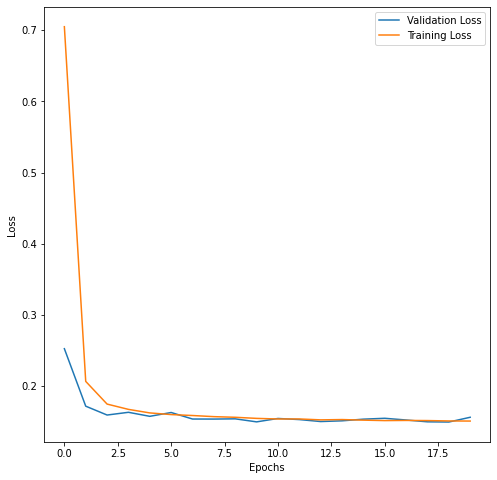

In [64]:
f_history = adam_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)
plot_loss(f_history)

It converges in under 20 epochs! 

# PyTorch Implementation 
This will be the code implementing the model shown directly above this section in PyTorch

I STILL CANNOT FIGURE OUT THE NUMBER OF INPUTS FOR EACH LAYER

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

from torch.utils import data
from torchsummary import summary

import itertools

X_train_2 = X_train.astype(np.float32)
y_train_2 = y_train.astype(np.float32)
X_test_2 = X_test.astype(np.float32)
y_test_2 = y_test.astype(np.float32)

X_train_2 = torch.tensor(X_train_2)
y_train_2 = torch.tensor(y_train_2)

X_test_2 = torch.tensor(X_test_2)
y_test_2 = torch.tensor(y_test_2)


In [36]:
print(X_train_2.size(0))
print(y_train_2.size(0)) 

4750
4750


In [37]:
# another function to load the data 
def load_array(data_arrays, batch_size, is_train=True):
    #Construct a PyTorch data iterator.
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [38]:
# running the function and then creating the tensor object for each aspect of the dataset
data_train = load_array((X_train_2, y_train_2), batch_size = 1)
data_test = load_array((X_test_2, y_test_2), batch_size = 1)
next(iter(data_train))
next(iter(data_test))

[tensor([[ 0.7489, -0.5247, -1.5556,  0.6634, -0.3072, -0.9451]]),
 tensor([-1.0861])]

In [39]:
 #starting by creating the Net object 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.dense1 = nn.Linear(6, 10)
        self.dense2 = nn.Linear(10, 20)
        self.dense3 = nn.Linear(20, 20)
        self.dense4 = nn.Linear(20, 1)

    def forward(self, x):
        x = F.relu(self.dense1(x))
        x = F.relu(self.dense2(x))
        x = F.relu(self.dense3(x))
        x = self.dense4(x)

        return x

net = Net()

# loss function and optimizer
loss = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.03)

In [46]:
train_loss = []
val_loss = []
epochs = 20

# function for training the nn
def net_train(epoch):
    for e in range(1, epoch + 1):
        for X_train_2, y_train_2 in data_train:   
            #calculating the training loss  
            tl = loss(net(X_train_2), y_train_2)

            #zeroing the gradient 
            optimizer.zero_grad() 

            # backward pass ONL Y FOR TRAIN LOSS 
            tl.backward()
            optimizer.step()

            
        tl = loss(net(X_train_2), y_train_2)
        #adding the loss to the list defined above
        train_loss.append(tl.item())
        print('Epoch: ', e , 'Training Loss: ', tl.item())

    print('Learning Finished')



In [47]:
net_train(epochs)

Epoch:  1 Training Loss:  0.005037777125835419
Epoch:  2 Training Loss:  0.01552506536245346
Epoch:  3 Training Loss:  0.5348237752914429
Epoch:  4 Training Loss:  0.10467641800642014
Epoch:  5 Training Loss:  0.024504054337739944
Epoch:  6 Training Loss:  0.44045114517211914
Epoch:  7 Training Loss:  0.28292202949523926
Epoch:  8 Training Loss:  0.5277014970779419
Epoch:  9 Training Loss:  0.0817636251449585
Epoch:  10 Training Loss:  0.00020717136794701219
Epoch:  11 Training Loss:  0.09201230853796005
Epoch:  12 Training Loss:  0.06529500335454941
Epoch:  13 Training Loss:  0.47259077429771423
Epoch:  14 Training Loss:  0.03770025074481964
Epoch:  15 Training Loss:  0.1059068962931633
Epoch:  16 Training Loss:  9.415824024472386e-05
Epoch:  17 Training Loss:  0.026009250432252884
Epoch:  18 Training Loss:  0.3857027292251587
Epoch:  19 Training Loss:  0.02571731060743332
Epoch:  20 Training Loss:  0.32781192660331726
Learning Finished


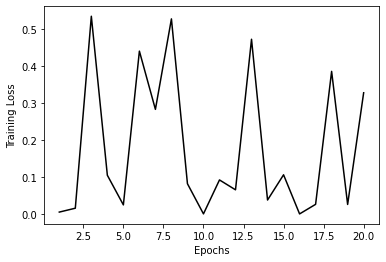

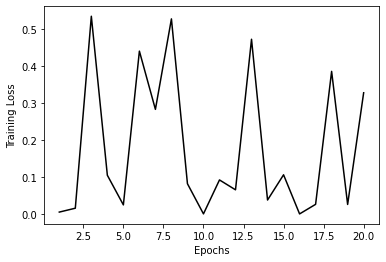

In [48]:
#plotting
fig = plt.figure()
plt.plot(range(1, epochs + 1), train_loss, color='black')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
fig